Tom Huang, Sasha Gozan-Keck, Maggie Kuo, Shu Rong Lin

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pyproj
import folium
from shapely.geometry import box
%matplotlib inline

In [ ]:
frisk=pd.read_csv("2023_nypd_stop_and_frisk_data.csv")
frisk

<ipython-input-44-5231a9d3726f>:1: DtypeWarning: Columns (78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  frisk=pd.read_csv("2023_nypd_stop_and_frisk_data.csv")


,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,2023-01-01,00:44:00,2023,January,Sunday,Based on Radio Run,APP,POM,804,...,BLUE HOODIE BLUE JEANS,5,A,3B,46 MADISON ST,MADISON ST,984781,198509,PBMS,MANHATTAN
1,2,2023-01-01,00:49:00,2023,January,Sunday,Based on Self Initiated,APP,POM,69,...,UNK,69,B,(null),9910 SEAVIEW AVE,SEAVIEW AVE,1015557,170379,PBBS,BROOKLYN
2,3,2023-01-01,05:31:00,2023,January,Sunday,Based on Radio Run,APP,POM,83,...,NaN,83,D,(null),TROUTMAN ST && ST NICHOLAS AVE,TROUTMAN ST,1005940,197103,PBBN,BROOKLYN
3,4,2023-01-01,04:59:00,2023,January,Sunday,Based on Self Initiated,APP,POM,113,...,(null),113,B,(null),FARMERS BLVD && 135 AVE,FARMERS BLVD,1049830,185439,PBQS,QUEENS
4,5,2023-01-01,05:21:00,2023,January,Sunday,Based on Self Initiated,APP,POF,46,...,(null),46,B,(null),2463 WEBSTER AVE,WEBSTER AVE,1013821,252710,PBBX,BRONX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16966,16967,2023-12-31,07:10:00,2023,December,Sunday,Based on C/W on Scene,APP,PO,114,...,BLACK JACKET BLACK SNEAKERS BROWN PANTS BLACK ...,114,D,(null),26-01 1 ST,1 ST,1002122,222229,PBQN,QUEENS
16967,16968,2023-12-31,07:10:00,2023,December,Sunday,Based on C/W on Scene,APP,PO,114,...,BLACK BEANIE HAT BLACK COAT BLACK PANTS BROWN ...,114,D,(null),26-01 1 ST,1 ST,1002122,222229,PBQN,QUEENS
16968,16969,2023-12-31,07:10:00,2023,December,Sunday,Based on C/W on Scene,APP,PO,114,...,BLACK COAT GREY PANTS WHITE NIKE SNEAKERS WITH...,114,D,(null),26-01 1 ST,1 ST,1002122,222229,PBQN,QUEENS
16969,16970,2023-12-31,00:42:00,2023,December,Sunday,Based on C/W on Scene,APP,PO,104,...,BLACK JACKET/ BLUE JEANS,104,C,(null),66 ST && 53 DR,66 ST,1012174,205064,PBQN,QUEENS


In [ ]:
frisk.isnull().values.any()

False

In [ ]:
frisk=frisk.dropna()

In [ ]:
frisk=frisk[["SUSPECTED_CRIME_DESCRIPTION", "OFFICER_EXPLAINED_STOP_FLAG", "SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED", "SUSPECT_ARRESTED_FLAG", "SUSPECT_ARREST_OFFENSE", "OFFICER_IN_UNIFORM_FLAG",
             "FRISKED_FLAG", "SEARCHED_FLAG","ASK_FOR_CONSENT_FLG", "CONSENT_GIVEN_FLG", "PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG", "SUSPECT_REPORTED_AGE",
             "SUSPECT_SEX", "SUSPECT_RACE_DESCRIPTION", "STOP_LOCATION_PRECINCT", "STOP_LOCATION_X", "STOP_LOCATION_Y"]]
frisk

,SUSPECTED_CRIME_DESCRIPTION,OFFICER_EXPLAINED_STOP_FLAG,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,SUSPECT_ARRESTED_FLAG,SUSPECT_ARREST_OFFENSE,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,CONSENT_GIVEN_FLG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_X,STOP_LOCATION_Y
0,MENACING,Y,Y,N,(null),Y,Y,N,N,N,Y,32,MALE,BLACK,5,984781,198509
1,CPW,N,Y,Y,CPW,Y,Y,Y,N,N,Y,23,MALE,WHITE HISPANIC,69,1015557,170379
3,CPW,Y,Y,N,(null),Y,Y,Y,N,Y,Y,20,MALE,BLACK,113,1049830,185439
4,CPW,N,N,Y,CPW,Y,Y,Y,N,N,Y,25,MALE,BLACK HISPANIC,46,1013821,252710
7,MENACING,Y,Y,N,(null),Y,N,N,Y,Y,Y,41,MALE,BLACK,25,1000287,230097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16966,BURGLARY,Y,N,Y,CRIMINAL TRESPASS,Y,Y,Y,N,N,Y,22,MALE,WHITE HISPANIC,114,1002122,222229
16967,BURGLARY,Y,N,Y,CRIMINAL TRESPASS,Y,Y,Y,N,N,Y,24,MALE,WHITE,114,1002122,222229
16968,BURGLARY,Y,N,Y,CRIMINAL TRESPASS,Y,Y,Y,N,N,Y,21,MALE,WHITE,114,1002122,222229
16969,MENACING,Y,N,Y,MENACING,Y,Y,Y,N,N,(null),45,MALE,ASIAN / PACIFIC ISLANDER,104,1012174,205064


In [ ]:
frisk.replace("(null)", pd.NA, inplace=True)
frisk1=frisk.dropna()
frisk1

,SUSPECTED_CRIME_DESCRIPTION,OFFICER_EXPLAINED_STOP_FLAG,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,SUSPECT_ARRESTED_FLAG,SUSPECT_ARREST_OFFENSE,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,CONSENT_GIVEN_FLG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_X,STOP_LOCATION_Y
1,CPW,N,Y,Y,CPW,Y,Y,Y,N,N,Y,23,MALE,WHITE HISPANIC,69,1015557,170379
4,CPW,N,N,Y,CPW,Y,Y,Y,N,N,Y,25,MALE,BLACK HISPANIC,46,1013821,252710
9,CPW,Y,Y,Y,CPW,Y,Y,Y,N,N,Y,65,MALE,BLACK,20,989173,221221
12,CPW,Y,N,Y,ASSAULT,Y,Y,Y,Y,Y,Y,27,MALE,BLACK,77,1002041,186193
13,ROBBERY,Y,Y,Y,OTHER,Y,Y,N,N,N,Y,26,MALE,BLACK,44,1006971,242703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16956,ASSAULT,Y,N,Y,ASSAULT,Y,Y,N,N,N,Y,27,MALE,BLACK,34,1008010,256689
16960,CPW,Y,Y,Y,CPW,Y,Y,Y,Y,Y,Y,24,MALE,BLACK,79,1000130,193510
16966,BURGLARY,Y,N,Y,CRIMINAL TRESPASS,Y,Y,Y,N,N,Y,22,MALE,WHITE HISPANIC,114,1002122,222229
16967,BURGLARY,Y,N,Y,CRIMINAL TRESPASS,Y,Y,Y,N,N,Y,24,MALE,WHITE,114,1002122,222229


What is your imagined position on this dataset. Who has hired you, what are the overall goals?

We could have been hired by the mayor of New York City to assess ways to decrease or end racial disparities that occur during stop-and-frisk searches. This is because the data shows that a vast majority of stop-and-frisk searches are disproportionately towards Black Americans, and yet many of these stops have been unlawful. Although stop-and-frisk searches were implemented for public safety, since 2003, there has been a rising trend where more stops have been made every year since, but most of the people who have been stopped were innocent. This highlights the corruption within NYPD and the administration when assessing civilians for danger.

Therefore, the overall goal of assessing this dataset is to show the mayor that corruption within the NYPD needs to be addressed, and to create stricter policies or programs within NYPD to educate current and future law enforcement
on proper danger assesstment.


What is the origin of the dataset. Who recorded the data? I promise you, it wasn't a user on kaggle.


Police officers in NYC are supposed to fill out a form recording the details of their stop. Before 2017, the forms were filled out manually but have since changed to electronic. These forms are then entered into the NYPD database. The stop-and-frisk data that NYPD reports occur in two ways: a quarterly summary report and a complete database annually released to the public.

The quarterly reports are released by the NYCLU every three months which includes data on stops, arrests, and summonses. It gets further broken down by precinct of stop, and the race and gender of the person stopped.

The annual database includes nearly all the data recorded by the police officer after a stop (like age, if the person was frisked, weapon or firearm recovered, if physical force was used, and exact loaction of the stop within the precinct). This data is uploaded to the NYPD database, then to their website anually.

Explain what all of your remaining columns represent, and whether they are text, numeric, or categorical in nature.



- SUSPECTED_CRIME_DESCRIPTION (Text): The crime the suspect was suspected of committing

- SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED (Categorical):  Indicates if a log entry was reviewed by a supervisor

- OFFICER_EXPLAINED_STOP_FLAG (Categorical): Indicates if the officer explained the reason for the stop to the suspect

- SUSPECT_ARRESTED_FLAG (Categorical): Indicates if the suspect was arrested

- SUSPECT_ARREST_OFFENSE (Text): Description of the offense for which the suspect was arrested

- OFFICER_IN_UNIFORM_FLAG (Categorical):  Indicates if the officer was in uniform during the stop

- FRISKED_FLAG (Categorical): Indicates if the suspect was frisked

- SEARCHED_FLAG (Categorical): Indicates if the suspect was searched

- ASK_FOR_CONSENT_FLAG (Categorical): Indicates if the officer asked for the suspect’s consent to search

- CONSENT_GIVEN_FLAG (Categorical):Indicates if the suspect gave consent for the search

- PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG (Categorical):  Indicates if verbal instructions were used as force

- SUSPECT_REPORTED_AGE (Numeric): The reported age of the suspect

- SUSPECT_SEX (Categorical): The reported sex of the suspect

- SUSPECT_RACE_DESCRIPTION (Categorical): The reported race of the suspect

- STOP_LOCATION_PRECINCT (Numeric): The precinct where the stop occurred

- STOP_LOCATION_X (Numeric): X-coordinate of the location the stop occurred
- STOP_LOCATION_Y (Numeric): Y-corrdinate of the location the stop occurred



In [ ]:
# We originally had around 50 columns and we dropped some based on our feedback from checkpoint 1.

Research Questions:

1. How accurately can we predict if someone will be stopped and frisked by the NYPD based on demographic information based on age, sex, and race? (regression)

2. Which precincts in New York City have higher rates of stop and frisk? (mapping)

3. Out of the reported stop and frisks, what fraction of NYPD officers asked the suspect for consent? Within the two kinds of cases, how many led to unncessary physical escalation? (data visualization)

4. Is there a relationship between whether or not a supervisor checked the logs and if an arrest occured? (regression)

In [ ]:
frisk1=gpd.read_file("2023_nypd_stop_and_frisk_data.csv")

In [ ]:
borough=gpd.read_file("Borough Boundaries.zip")
borough

,boro_code,boro_name,shape_area,shape_leng,geometry
0,3.0,Brooklyn,1.934143e+09,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
1,5.0,Staten Island,1.623619e+09,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,1.0,Manhattan,6.366461e+08,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,2.0,Bronx,1.187175e+09,463180.578878,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
4,4.0,Queens,3.041418e+09,888197.010944,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [ ]:
frisk.replace("(null)", pd.NA, inplace=True)
frisk1=frisk.dropna()
frisk1

,SUSPECTED_CRIME_DESCRIPTION,OFFICER_EXPLAINED_STOP_FLAG,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,SUSPECT_ARRESTED_FLAG,SUSPECT_ARREST_OFFENSE,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,CONSENT_GIVEN_FLG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_X,STOP_LOCATION_Y
1,CPW,N,Y,Y,CPW,Y,Y,Y,N,N,Y,23,MALE,WHITE HISPANIC,69,1015557,170379
4,CPW,N,N,Y,CPW,Y,Y,Y,N,N,Y,25,MALE,BLACK HISPANIC,46,1013821,252710
9,CPW,Y,Y,Y,CPW,Y,Y,Y,N,N,Y,65,MALE,BLACK,20,989173,221221
12,CPW,Y,N,Y,ASSAULT,Y,Y,Y,Y,Y,Y,27,MALE,BLACK,77,1002041,186193
13,ROBBERY,Y,Y,Y,OTHER,Y,Y,N,N,N,Y,26,MALE,BLACK,44,1006971,242703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16956,ASSAULT,Y,N,Y,ASSAULT,Y,Y,N,N,N,Y,27,MALE,BLACK,34,1008010,256689
16960,CPW,Y,Y,Y,CPW,Y,Y,Y,Y,Y,Y,24,MALE,BLACK,79,1000130,193510
16966,BURGLARY,Y,N,Y,CRIMINAL TRESPASS,Y,Y,Y,N,N,Y,22,MALE,WHITE HISPANIC,114,1002122,222229
16967,BURGLARY,Y,N,Y,CRIMINAL TRESPASS,Y,Y,Y,N,N,Y,24,MALE,WHITE,114,1002122,222229


In [ ]:
frisk1['STOP_LOCATION_X'] = pd.to_numeric(frisk1['STOP_LOCATION_X'], errors='coerce')

<ipython-input-53-fd76de43cb79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frisk1['STOP_LOCATION_X'] = pd.to_numeric(frisk1['STOP_LOCATION_X'], errors='coerce')


In [ ]:
frisk_gdf = gpd.GeoDataFrame(frisk1, geometry=gpd.points_from_xy(frisk1.STOP_LOCATION_Y, frisk1.STOP_LOCATION_X))
frisk_gdf.head(3)

,SUSPECTED_CRIME_DESCRIPTION,OFFICER_EXPLAINED_STOP_FLAG,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,SUSPECT_ARRESTED_FLAG,SUSPECT_ARREST_OFFENSE,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,CONSENT_GIVEN_FLG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_X,STOP_LOCATION_Y,geometry
1,CPW,N,Y,Y,CPW,Y,Y,Y,N,N,Y,23,MALE,WHITE HISPANIC,69,1015557,170379,POINT (170379 1015557)
4,CPW,N,N,Y,CPW,Y,Y,Y,N,N,Y,25,MALE,BLACK HISPANIC,46,1013821,252710,POINT (252710 1013821)
9,CPW,Y,Y,Y,CPW,Y,Y,Y,N,N,Y,65,MALE,BLACK,20,989173,221221,POINT (221221 989173)


<Axes: >

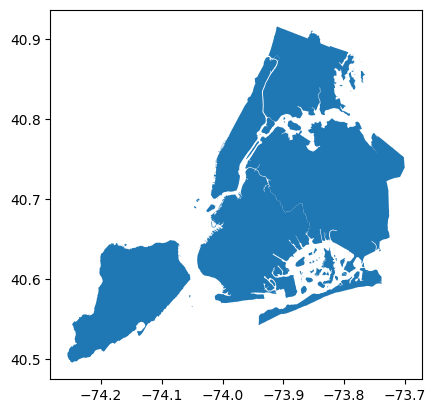

In [ ]:
borough.plot()

In [ ]:
borough.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
frisk_gdf.set_crs(epsg=4326,inplace=True)

,SUSPECTED_CRIME_DESCRIPTION,OFFICER_EXPLAINED_STOP_FLAG,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,SUSPECT_ARRESTED_FLAG,SUSPECT_ARREST_OFFENSE,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,CONSENT_GIVEN_FLG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_X,STOP_LOCATION_Y,geometry
1,CPW,N,Y,Y,CPW,Y,Y,Y,N,N,Y,23,MALE,WHITE HISPANIC,69,1015557,170379,POINT (170379 1015557)
4,CPW,N,N,Y,CPW,Y,Y,Y,N,N,Y,25,MALE,BLACK HISPANIC,46,1013821,252710,POINT (252710 1013821)
9,CPW,Y,Y,Y,CPW,Y,Y,Y,N,N,Y,65,MALE,BLACK,20,989173,221221,POINT (221221 989173)
12,CPW,Y,N,Y,ASSAULT,Y,Y,Y,Y,Y,Y,27,MALE,BLACK,77,1002041,186193,POINT (186193 1002041)
13,ROBBERY,Y,Y,Y,OTHER,Y,Y,N,N,N,Y,26,MALE,BLACK,44,1006971,242703,POINT (242703 1006971)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16956,ASSAULT,Y,N,Y,ASSAULT,Y,Y,N,N,N,Y,27,MALE,BLACK,34,1008010,256689,POINT (256689 1008010)
16960,CPW,Y,Y,Y,CPW,Y,Y,Y,Y,Y,Y,24,MALE,BLACK,79,1000130,193510,POINT (193510 1000130)
16966,BURGLARY,Y,N,Y,CRIMINAL TRESPASS,Y,Y,Y,N,N,Y,22,MALE,WHITE HISPANIC,114,1002122,222229,POINT (222229 1002122)
16967,BURGLARY,Y,N,Y,CRIMINAL TRESPASS,Y,Y,Y,N,N,Y,24,MALE,WHITE,114,1002122,222229,POINT (222229 1002122)


In [ ]:
frisk_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
borough.total_bounds
#https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.total_bounds.html

array([-74.25559136,  40.49613399, -73.70000906,  40.91553278])

ValueError: aspect must be finite and positive 

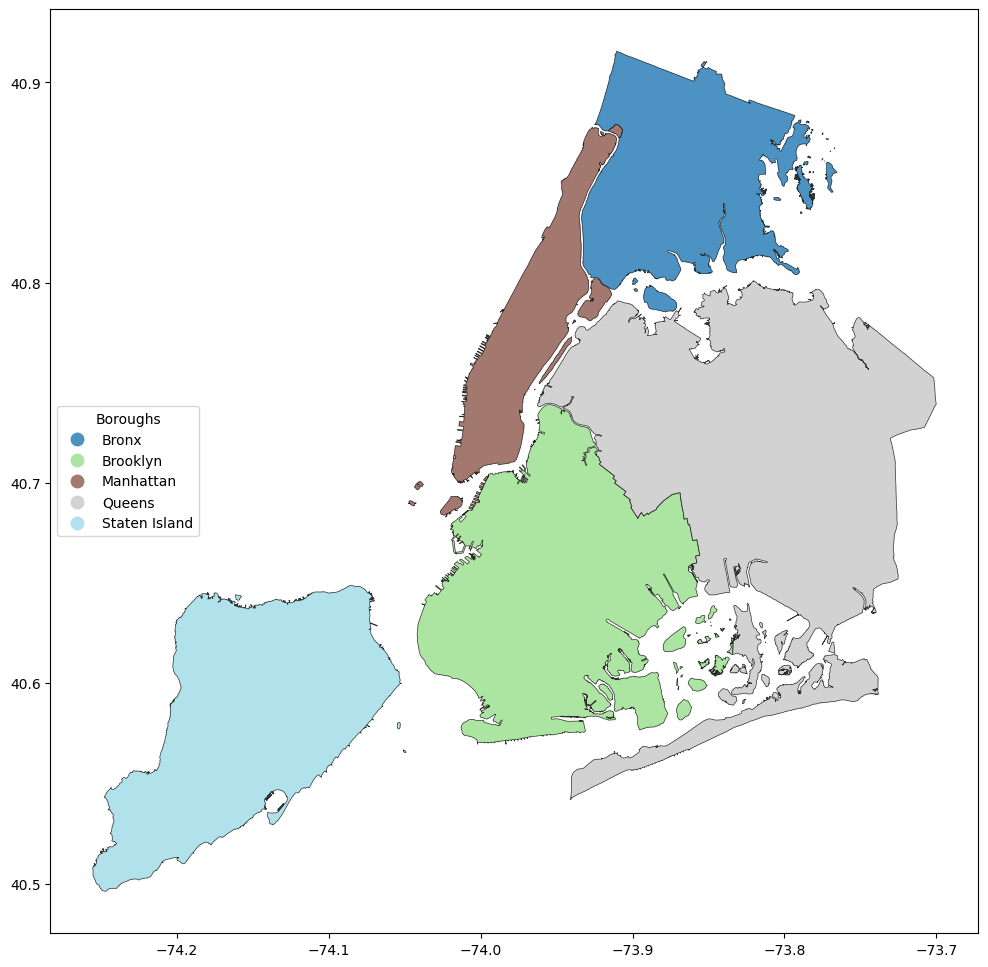

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
borough.plot(ax=ax, edgecolor='black', alpha=0.8, linewidth=0.5, column="boro_name", cmap="tab20", legend=True, legend_kwds={"loc": "center left", "title": "Boroughs"})
#https://stackoverflow.com/questions/58616454/geodataframe-map-plot-seems-to-ignore-legend-kwds
frisk_gdf.plot(ax=ax, markersize=5, column="STOP_LOCATION_PRECINCT", alpha=0.8, cmap="Set1", legend=True,  legend_kwds={"orientation": "horizontal", "label": "Precinct Stop Location"})

ax.set_title("Stop and Frisk Precinct Locations in NYC", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)


ax.set_xlim(borough.total_bounds[0], borough.total_bounds[2])
ax.set_ylim(borough.total_bounds[1], borough.total_bounds[3])
#https://stackoverflow.com/questions/61505844/geopandas-data-not-plotting-correctly/61515364#61515364


plt.show()